In [1]:
#Importaciones
from functions import *
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#Cargando base de datos
url_robberies = ("https://github.com/LuisHRF/Home-Insurance-Study-Project-/raw/main/01002%20(1).xlsx")
data_raw_robberies = pd.read_excel(url_robberies)

In [3]:
data_clean = data_raw_robberies.dropna()
data_clean 

,,1. CONTRA LAS PERSONAS,1.2.-Lesiones,5.1.-Hurtos,5.2.-Robos con fuerza en las cosas,5.2.1.-Robos con fuerza en las cosas en el interior de vehículos,5.2.2.-Robos con fuerza en viviendas,5.2.3.-Robos con fuerza en establecimientos,5.3.-Robos con violencia o intimidación,5.3.1.-Robos con violencia en vía pública,5.3.2.-Robos con violencia en viviendas,5.3.3.-Robos con violencia en establecimientos
1,Total Nacional,226761.0,118125.0,665622.0,272638.0,104988.0,84721.0,35072.0,64711.0,44406.0,3844.0,8238.0
2,Araba/Álava,1386.0,745.0,4184.0,1099.0,8.0,434.0,178.0,114.0,82.0,6.0,14.0
3,Albacete,1638.0,851.0,3771.0,1784.0,421.0,636.0,204.0,211.0,120.0,23.0,46.0
4,Alicante/Alacant,11416.0,5326.0,27014.0,12716.0,3723.0,6275.0,1241.0,1997.0,1161.0,245.0,343.0
5,Almería,4343.0,2517.0,6437.0,4193.0,1106.0,1602.0,399.0,657.0,397.0,67.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
779,Zaragoza,5171.0,1988.0,14860.0,7904.0,1895.0,1756.0,1271.0,1531.0,1052.0,96.0,235.0
780,Ceuta,833.0,393.0,983.0,723.0,497.0,93.0,49.0,189.0,141.0,8.0,13.0
781,Melilla,1011.0,501.0,1043.0,774.0,427.0,156.0,79.0,194.0,171.0,1.0,8.0
782,En el extranjero,158.0,17.0,2427.0,674.0,142.0,19.0,51.0,177.0,138.0,5.0,6.0


In [4]:
# Ver los valores únicos de la primera columna
unique_first_column = data_clean.iloc[:, 0].unique()
unique_first_column

array(['    Total Nacional', '    Araba/Álava', '    Albacete',
       '    Alicante/Alacant', '    Almería', '    Ávila', '    Badajoz',
       '    Balears (Illes)', '    Barcelona', '    Burgos',
       '    Cáceres', '    Cádiz', '    Castellón/Castelló',
       '    Ciudad Real', '    Córdoba', '    Coruña (A)', '    Cuenca',
       '    Girona', '    Granada', '    Guadalajara', '    Gipuzkoa',
       '    Huelva', '    Huesca', '    Jaén', '    León', '    Lleida',
       '    Rioja (La)', '    Lugo', '    Madrid', '    Málaga',
       '    Murcia', '    Navarra', '    Ourense', '    Asturias',
       '    Palencia', '    Palmas (Las)', '    Pontevedra',
       '    Salamanca', '    Santa Cruz de Tenerife', '    Cantabria',
       '    Segovia', '    Sevilla', '    Soria', '    Tarragona',
       '    Teruel', '    Toledo', '    Valencia/València',
       '    Valladolid', '    Bizkaia', '    Zamora', '    Zaragoza',
       '    Ceuta', '    Melilla', '    En el extranjero',
   

In [5]:
block_sizes = [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
start = 1
year_ranges = {}

for i, size in enumerate(block_sizes):
    end = start + size - 1
    year = 2023 - i
    year_ranges[(start, end)] = year
    start = end + 2  

print(year_ranges)

{(1, 55): 2023, (57, 111): 2022, (113, 167): 2021, (169, 223): 2020, (225, 279): 2019, (281, 335): 2018, (337, 391): 2017, (393, 447): 2016, (449, 503): 2015, (505, 559): 2014, (561, 615): 2013, (617, 671): 2012, (673, 727): 2011, (729, 783): 2010}


In [6]:
def defi_years_per_block(data_frame, year_range):

    data_frame_cp = data_frame.copy()

    for (first_row, last_row), year in year_range.items():
        data_frame_cp.loc[first_row:last_row, 'Year'] = year

    return data_frame_cp

In [7]:
data_clean_years = defi_years_per_block(data_clean, year_ranges)

In [8]:
data_clean_years.tail(10)

,,1. CONTRA LAS PERSONAS,1.2.-Lesiones,5.1.-Hurtos,5.2.-Robos con fuerza en las cosas,5.2.1.-Robos con fuerza en las cosas en el interior de vehículos,5.2.2.-Robos con fuerza en viviendas,5.2.3.-Robos con fuerza en establecimientos,5.3.-Robos con violencia o intimidación,5.3.1.-Robos con violencia en vía pública,5.3.2.-Robos con violencia en viviendas,5.3.3.-Robos con violencia en establecimientos,Year
774,Toledo,4301.0,1476.0,5420.0,7131.0,487.0,2313.0,1175.0,398.0,229.0,30.0,90.0,2010.0
775,Valencia/València,17646.0,6380.0,44641.0,32568.0,9350.0,9451.0,3897.0,6345.0,4505.0,388.0,774.0,2010.0
776,Valladolid,3183.0,1121.0,7937.0,2993.0,652.0,565.0,506.0,301.0,180.0,23.0,64.0,2010.0
777,Bizkaia,6945.0,2849.0,15197.0,10849.0,29.0,2336.0,1470.0,2045.0,1449.0,157.0,261.0,2010.0
778,Zamora,810.0,340.0,1090.0,752.0,93.0,165.0,205.0,62.0,33.0,7.0,18.0,2010.0
779,Zaragoza,5171.0,1988.0,14860.0,7904.0,1895.0,1756.0,1271.0,1531.0,1052.0,96.0,235.0,2010.0
780,Ceuta,833.0,393.0,983.0,723.0,497.0,93.0,49.0,189.0,141.0,8.0,13.0,2010.0
781,Melilla,1011.0,501.0,1043.0,774.0,427.0,156.0,79.0,194.0,171.0,1.0,8.0,2010.0
782,En el extranjero,158.0,17.0,2427.0,674.0,142.0,19.0,51.0,177.0,138.0,5.0,6.0,2010.0
783,Desconocida,6.0,5.0,188.0,218.0,0.0,3.0,30.0,5.0,2.0,1.0,0.0,2010.0


In [9]:
# Limpieza de Encabezados
data_clean_years.columns = data_clean_years.columns.str.lower().str.replace(" ", "_")
data_clean_years = data_clean_years.rename(columns={
    "_": "Province"
})
data_clean_years


,Province,1._contra_las_personas,1.2.-lesiones,5.1.-hurtos,5.2.-robos_con_fuerza_en_las_cosas,5.2.1.-robos_con_fuerza_en_las_cosas_en_el_interior_de_vehículos,5.2.2.-robos_con_fuerza_en_viviendas,5.2.3.-robos_con_fuerza_en_establecimientos,5.3.-robos_con_violencia_o_intimidación,5.3.1.-robos_con_violencia_en_vía_pública,5.3.2.-robos_con_violencia_en_viviendas,5.3.3.-robos_con_violencia_en_establecimientos,year
1,Total Nacional,226761.0,118125.0,665622.0,272638.0,104988.0,84721.0,35072.0,64711.0,44406.0,3844.0,8238.0,2023.0
2,Araba/Álava,1386.0,745.0,4184.0,1099.0,8.0,434.0,178.0,114.0,82.0,6.0,14.0,2023.0
3,Albacete,1638.0,851.0,3771.0,1784.0,421.0,636.0,204.0,211.0,120.0,23.0,46.0,2023.0
4,Alicante/Alacant,11416.0,5326.0,27014.0,12716.0,3723.0,6275.0,1241.0,1997.0,1161.0,245.0,343.0,2023.0
5,Almería,4343.0,2517.0,6437.0,4193.0,1106.0,1602.0,399.0,657.0,397.0,67.0,81.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,Zaragoza,5171.0,1988.0,14860.0,7904.0,1895.0,1756.0,1271.0,1531.0,1052.0,96.0,235.0,2010.0
780,Ceuta,833.0,393.0,983.0,723.0,497.0,93.0,49.0,189.0,141.0,8.0,13.0,2010.0
781,Melilla,1011.0,501.0,1043.0,774.0,427.0,156.0,79.0,194.0,171.0,1.0,8.0,2010.0
782,En el extranjero,158.0,17.0,2427.0,674.0,142.0,19.0,51.0,177.0,138.0,5.0,6.0,2010.0


In [10]:
columns_titles = ["1._contra_las_personas","1.2.-lesiones","5.1.-hurtos","5.2.-robos_con_fuerza_en_las_cosas","5.2.1.-robos_con_fuerza_en_las_cosas_en_el_interior_de_vehículos","5.2.2.-robos_con_fuerza_en_viviendas","5.2.3.-robos_con_fuerza_en_establecimientos","5.3.-robos_con_violencia_o_intimidación","5.3.1.-robos_con_violencia_en_vía_pública","5.3.2.-robos_con_violencia_en_viviendas","5.3.3.-robos_con_violencia_en_establecimientos"]
translations = {"1._contra_las_personas": "Assault",
                "1.2.-lesiones" :"Injuries",
                "5.1.-hurtos":"small robberies",
                "5.2.-robos_con_fuerza_en_las_cosas":"robs_with_force",
                "5.2.1.-robos_con_fuerza_en_las_cosas_en_el_interior_de_vehículos":"robs_force_vehicles",
                "5.2.2.-robos_con_fuerza_en_viviendas":"robs_force_homes",
                "5.2.3.-robos_con_fuerza_en_establecimientos":"robs_force_stores",
                "5.3.-robos_con_violencia_o_intimidación":"robs_violence_intimidation",
                "5.3.1.-robos_con_violencia_en_vía_pública":"robs_violence_publicways",
                "5.3.2.-robos_con_violencia_en_viviendas":"robs_violence_homes",
                "5.3.3.-robos_con_violencia_en_establecimientos":"robs_violence_stores"
}

In [11]:
def traducir_columnas(columns_titles, translations):
    return [translations.get(col, col) for col in columns_titles]
print(traducir_columnas(columns_titles, translations))

['Assault', 'Injuries', 'small robberies', 'robs_with_force', 'robs_force_vehicles', 'robs_force_homes', 'robs_force_stores', 'robs_violence_intimidation', 'robs_violence_publicways', 'robs_violence_homes', 'robs_violence_stores']


In [12]:
# Suponiendo que tu DataFrame se llama data_clean_years
data_clean_years.columns = traducir_columnas(data_clean_years.columns, translations)

In [13]:
print(data_clean_years)

                 Province   Assault  Injuries  small robberies  \
1          Total Nacional  226761.0  118125.0         665622.0   
2             Araba/Álava    1386.0     745.0           4184.0   
3                Albacete    1638.0     851.0           3771.0   
4        Alicante/Alacant   11416.0    5326.0          27014.0   
5                 Almería    4343.0    2517.0           6437.0   
..                    ...       ...       ...              ...   
779              Zaragoza    5171.0    1988.0          14860.0   
780                 Ceuta     833.0     393.0            983.0   
781               Melilla    1011.0     501.0           1043.0   
782      En el extranjero     158.0      17.0           2427.0   
783           Desconocida       6.0       5.0            188.0   

     robs_with_force  robs_force_vehicles  robs_force_homes  \
1           272638.0             104988.0           84721.0   
2             1099.0                  8.0             434.0   
3             1784

In [14]:
# Eliminar la columna sin nombre (usualmente aparece como "Unnamed: 0")
data_clean_years = data_clean_years.drop(columns=[col for col in data_clean_years.columns if "Unnamed" in col])
data_clean_years

,Province,Assault,Injuries,small robberies,robs_with_force,robs_force_vehicles,robs_force_homes,robs_force_stores,robs_violence_intimidation,robs_violence_publicways,robs_violence_homes,robs_violence_stores,year
1,Total Nacional,226761.0,118125.0,665622.0,272638.0,104988.0,84721.0,35072.0,64711.0,44406.0,3844.0,8238.0,2023.0
2,Araba/Álava,1386.0,745.0,4184.0,1099.0,8.0,434.0,178.0,114.0,82.0,6.0,14.0,2023.0
3,Albacete,1638.0,851.0,3771.0,1784.0,421.0,636.0,204.0,211.0,120.0,23.0,46.0,2023.0
4,Alicante/Alacant,11416.0,5326.0,27014.0,12716.0,3723.0,6275.0,1241.0,1997.0,1161.0,245.0,343.0,2023.0
5,Almería,4343.0,2517.0,6437.0,4193.0,1106.0,1602.0,399.0,657.0,397.0,67.0,81.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,Zaragoza,5171.0,1988.0,14860.0,7904.0,1895.0,1756.0,1271.0,1531.0,1052.0,96.0,235.0,2010.0
780,Ceuta,833.0,393.0,983.0,723.0,497.0,93.0,49.0,189.0,141.0,8.0,13.0,2010.0
781,Melilla,1011.0,501.0,1043.0,774.0,427.0,156.0,79.0,194.0,171.0,1.0,8.0,2010.0
782,En el extranjero,158.0,17.0,2427.0,674.0,142.0,19.0,51.0,177.0,138.0,5.0,6.0,2010.0


In [15]:
# Restablecer el índice en 10 resultados
data_clean_years.reset_index(drop=True, inplace=True)
print(data_clean_years.to_string(index=False))

                  Province  Assault  Injuries  small robberies  robs_with_force  robs_force_vehicles  robs_force_homes  robs_force_stores  robs_violence_intimidation  robs_violence_publicways  robs_violence_homes  robs_violence_stores   year
            Total Nacional 226761.0  118125.0         665622.0         272638.0             104988.0           84721.0            35072.0                     64711.0                   44406.0               3844.0                8238.0 2023.0
               Araba/Álava   1386.0     745.0           4184.0           1099.0                  8.0             434.0              178.0                       114.0                      82.0                  6.0                  14.0 2023.0
                  Albacete   1638.0     851.0           3771.0           1784.0                421.0             636.0              204.0                       211.0                     120.0                 23.0                  46.0 2023.0
          Alicante/Alacant  1141

In [16]:
data_clean_years.head(100)

,Province,Assault,Injuries,small robberies,robs_with_force,robs_force_vehicles,robs_force_homes,robs_force_stores,robs_violence_intimidation,robs_violence_publicways,robs_violence_homes,robs_violence_stores,year
0,Total Nacional,226761.0,118125.0,665622.0,272638.0,104988.0,84721.0,35072.0,64711.0,44406.0,3844.0,8238.0,2023.0
1,Araba/Álava,1386.0,745.0,4184.0,1099.0,8.0,434.0,178.0,114.0,82.0,6.0,14.0,2023.0
2,Albacete,1638.0,851.0,3771.0,1784.0,421.0,636.0,204.0,211.0,120.0,23.0,46.0,2023.0
3,Alicante/Alacant,11416.0,5326.0,27014.0,12716.0,3723.0,6275.0,1241.0,1997.0,1161.0,245.0,343.0,2023.0
4,Almería,4343.0,2517.0,6437.0,4193.0,1106.0,1602.0,399.0,657.0,397.0,67.0,81.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Segovia,607.0,327.0,949.0,577.0,87.0,233.0,44.0,25.0,13.0,1.0,7.0,2022.0
96,Sevilla,9870.0,5577.0,24400.0,13508.0,6969.0,2779.0,1587.0,2455.0,1763.0,145.0,323.0,2022.0
97,Soria,406.0,199.0,515.0,297.0,29.0,97.0,37.0,7.0,5.0,0.0,2.0,2022.0
98,Tarragona,2761.0,1591.0,10196.0,7650.0,2801.0,2960.0,723.0,1101.0,685.0,78.0,173.0,2022.0


In [17]:
'''
def verify_and_switch_datatypes(data_clean_years, column_name, assigned_types):
    column_name = data_clean_years[column_name]
    currently_type = data_clean_years[column_name].dtype
    assigned_types = {'Province': str,
                      'Assault': int,
                      'physical injuries':int,
                      'small_robberies':int,
                      'robberies_with_force':int,
                      'robberies_force_vehicles': int, 
                      'hard_robbvehicles':int, 
                      'robs_force_homes':int, 
                      'robs_force_establishments':int, 
                      'robs_violence_intimidation':int,
                      'robs_violence_publicways':int,
                      'robs_violence_homes':int, 
                      'robs_violence_establishments':int,
                      'year':int
                      }
    for column_name, assigned_types in assigned_types.items():
        if currently_type != assigned_types:
            try:
                data_clean_years[column_name] = data_clean_years[column_name].astype(assigned_types)
                print(f"Column '{column_name}' converted from {currently_type} a {assigned_types}.")
            except Exception as e:
                print(f"It was no possible to switch the '{column_name}' type into {assigned_types}: {e}")
        else:
            print(f"Column '{column_name}' is currently right typed as ({currently_type}).")
    
    return data_clean_years
'''

'\ndef verify_and_switch_datatypes(data_clean_years, column_name, assigned_types):\n    column_name = data_clean_years[column_name]\n    currently_type = data_clean_years[column_name].dtype\n    assigned_types = {\'Province\': str,\n                      \'Assault\': int,\n                      \'physical injuries\':int,\n                      \'small_robberies\':int,\n                      \'robberies_with_force\':int,\n                      \'robberies_force_vehicles\': int, \n                      \'hard_robbvehicles\':int, \n                      \'robs_force_homes\':int, \n                      \'robs_force_establishments\':int, \n                      \'robs_violence_intimidation\':int,\n                      \'robs_violence_publicways\':int,\n                      \'robs_violence_homes\':int, \n                      \'robs_violence_establishments\':int,\n                      \'year\':int\n                      }\n    for column_name, assigned_types in assigned_types.items():\n 

In [18]:
def verify_and_switch_datatypes(data_clean_years, assigned_types):
    # Itera sobre cada columna y su tipo asignado en el diccionario
    for column_name, expected_type in assigned_types.items():
        # Obtiene el tipo actual de la columna
        currently_type = data_clean_years[column_name].dtype
        
        if currently_type != expected_type:
            try:
                # Convierte la columna al tipo esperado
                data_clean_years[column_name] = data_clean_years[column_name].astype(expected_type)
                print(f"Column '{column_name}' converted from {currently_type} to {expected_type}.")
            except Exception as e:
                print(f"It was not possible to switch the '{column_name}' type to {expected_type}: {e}")
        else:
            print(f"Column '{column_name}' is currently correctly typed as ({currently_type}).")
    
    return data_clean_years

# Ejemplo de cómo aplicar la función
assigned_types = {
    'Province': str,
    'Assault': int,
    'Injuries': int,
    'small robberies': int,
    'robs_with_force': int,
    'robs_force_vehicles': int,  
    'robs_force_homes': int,
    'robs_force_stores': int,
    'robs_violence_intimidation': int,
    'robs_violence_publicways': int,
    'robs_violence_homes': int, 
    'robs_violence_stores': int,
    'year': int
}

# Supongamos que `data_clean_years` es tu DataFrame
data_clean_years = verify_and_switch_datatypes(data_clean_years, assigned_types)

Column 'Province' converted from object to <class 'str'>.
Column 'Assault' converted from float64 to <class 'int'>.
Column 'Injuries' converted from float64 to <class 'int'>.
Column 'small robberies' converted from float64 to <class 'int'>.
Column 'robs_with_force' converted from float64 to <class 'int'>.
Column 'robs_force_vehicles' converted from float64 to <class 'int'>.
Column 'robs_force_homes' converted from float64 to <class 'int'>.
Column 'robs_force_stores' converted from float64 to <class 'int'>.
Column 'robs_violence_intimidation' converted from float64 to <class 'int'>.
Column 'robs_violence_publicways' converted from float64 to <class 'int'>.
Column 'robs_violence_homes' converted from float64 to <class 'int'>.
Column 'robs_violence_stores' converted from float64 to <class 'int'>.
Column 'year' converted from float64 to <class 'int'>.


In [19]:
def convert_year_into_datetime(data_clean_years):
    data_clean_years['year'] = pd.to_datetime(data_clean_years['year'].astype(str) + '-01-01')

In [20]:
data_clean_years

,Province,Assault,Injuries,small robberies,robs_with_force,robs_force_vehicles,robs_force_homes,robs_force_stores,robs_violence_intimidation,robs_violence_publicways,robs_violence_homes,robs_violence_stores,year
0,Total Nacional,226761,118125,665622,272638,104988,84721,35072,64711,44406,3844,8238,2023
1,Araba/Álava,1386,745,4184,1099,8,434,178,114,82,6,14,2023
2,Albacete,1638,851,3771,1784,421,636,204,211,120,23,46,2023
3,Alicante/Alacant,11416,5326,27014,12716,3723,6275,1241,1997,1161,245,343,2023
4,Almería,4343,2517,6437,4193,1106,1602,399,657,397,67,81,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,Zaragoza,5171,1988,14860,7904,1895,1756,1271,1531,1052,96,235,2010
766,Ceuta,833,393,983,723,497,93,49,189,141,8,13,2010
767,Melilla,1011,501,1043,774,427,156,79,194,171,1,8,2010
768,En el extranjero,158,17,2427,674,142,19,51,177,138,5,6,2010


In [ ]:
# SUMAR TODOS LOS DELITOS DE TODOS LOS AÑOS PARA CADA PROVINCIA

delitos_columns = [
    'Assault', 'Injuries', 'small robberies', 'robs_with_force',
    'robs_force_vehicles', 'robs_force_homes', 'robs_force_stores',
    'robs_violence_intimidation', 'robs_violence_publicways',
    'robs_violence_homes', 'robs_violence_stores'
]

# Agrupar y sumar
df_suma_delitos = data_clean_years.groupby('Province')[delitos_columns].sum().reset_index()

print(df_suma_delitos)

In [23]:
# df_suma_delitos.to_excel('suma_delitos_por_provincia.xlsx', index=False)

In [ ]:
df_suma_delitos['Total'] = df_suma_delitos.iloc[:, 1:].sum(axis=1)

# Ver el resultado
print(df_suma_delitos[['Province', 'Total']])

### VAMOS CON LAS TENDENCIAS

In [25]:
# Tenemos que agrupar todos los delitos por año y provincia

columns_to_sum = ['Assault', 'Injuries', 'small robberies', 'robs_with_force',
                  'robs_force_vehicles', 'robs_force_homes', 'robs_force_stores',
                  'robs_violence_intimidation', 'robs_violence_publicways',
                  'robs_violence_homes', 'robs_violence_stores']

# Creamos una nueva columna que sume todos los delitos para cada provincia y año
data_clean_years['total_crimes'] = data_clean_years[columns_to_sum].sum(axis=1)

# Visualizamos el DataFrame con la nueva columna
print(data_clean_years[['Province', 'year', 'total_crimes']])

                 Province  year  total_crimes
0          Total Nacional  2023       1629126
1             Araba/Álava  2023          8250
2                Albacete  2023          9705
3        Alicante/Alacant  2023         71457
4                 Almería  2023         21799
..                    ...   ...           ...
765              Zaragoza  2010         37759
766                 Ceuta  2010          3922
767               Melilla  2010          4365
768      En el extranjero  2010          3814
769           Desconocida  2010           458

[770 rows x 3 columns]


c:\Users\Carlos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


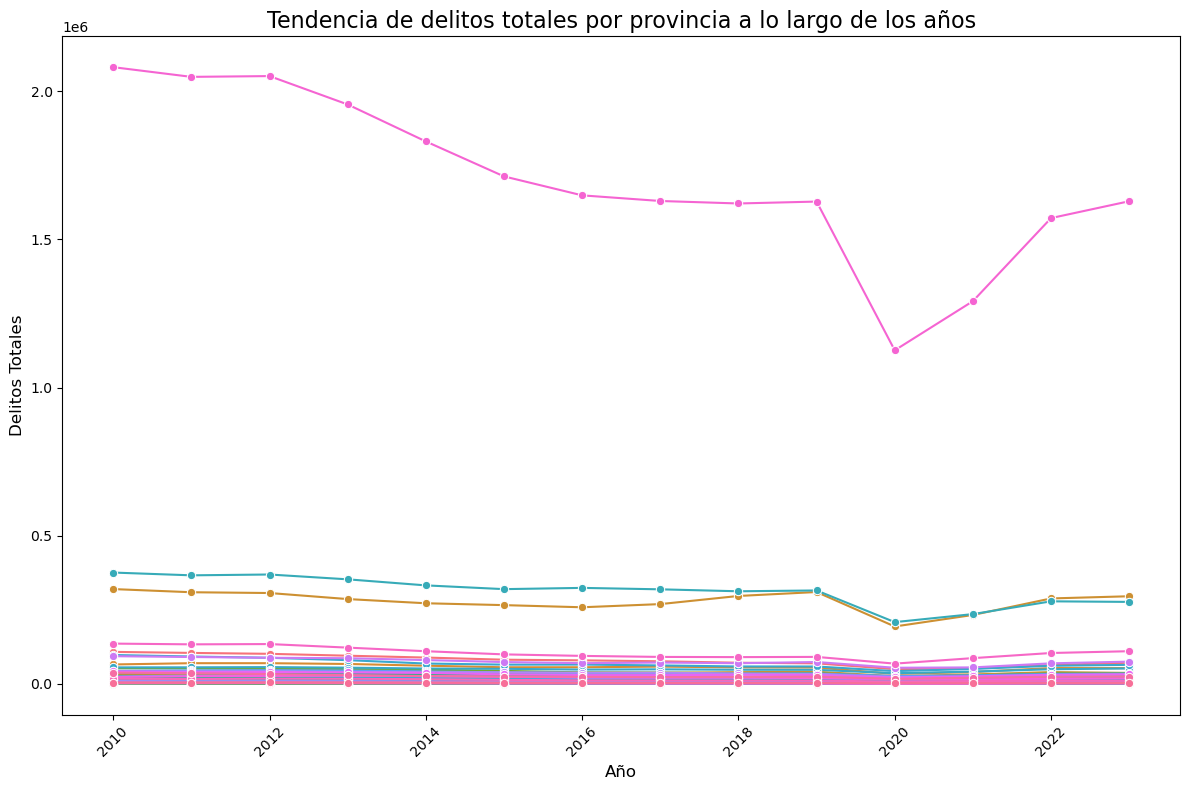

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos que el DataFrame esté ordenado por provincia y año
df_sorted = data_clean_years[['Province', 'year', 'total_crimes']].sort_values(by=['Province', 'year'])

# Configuración del tamaño de la gráfica
plt.figure(figsize=(12, 8))

# Graficamos las tendencias de cada provincia
sns.lineplot(data=df_sorted, x='year', y='total_crimes', hue='Province', marker='o', legend=False)

# Ajustamos el título y las etiquetas
plt.title('Tendencia de delitos totales por provincia a lo largo de los años', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Delitos Totales', fontsize=12)

# Mejoramos la visualización de los ticks en el eje X
plt.xticks(rotation=45)

# Mostramos la gráfica
plt.tight_layout()
plt.show()

In [27]:
# Filtrar las provincias con menos incremento tendencial

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Inicializamos un diccionario para almacenar la tasa de crecimiento de cada provincia
crecimiento = {}

# Iteramos sobre cada provincia
for provincia in data_clean_years['Province'].unique():
    df_provincia = data_clean_years[data_clean_years['Province'] == provincia]
    
    # Preparamos los datos para la regresión
    X = df_provincia['year'].values.reshape(-1, 1)
    y = df_provincia['total_crimes'].values
    
    # Realizamos la regresión lineal
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Almacenamos la pendiente (tasa de crecimiento) en el diccionario
    crecimiento[provincia] = modelo.coef_[0]

# Convertimos el diccionario en un DataFrame para facilitar la manipulación
df_crecimiento = pd.DataFrame(list(crecimiento.items()), columns=['Province', 'Growth Rate'])

# Ordenamos las provincias por tasa de crecimiento y seleccionamos las más altas
top_provincias = df_crecimiento.sort_values(by='Growth Rate', ascending=False).head(10)['Province'].tolist()

In [29]:
# Filtramos el DataFrame para incluir solo las provincias con mayor crecimiento
df_filtrado_crecimiento = data_clean_years[data_clean_years['Province'].isin(top_provincias)]

# Ordenamos el DataFrame filtrado por provincia y año
df_filtrado_crecimiento_sorted = df_filtrado_crecimiento[['Province', 'year', 'total_crimes']].sort_values(by=['Province', 'year'])

c:\Users\Carlos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


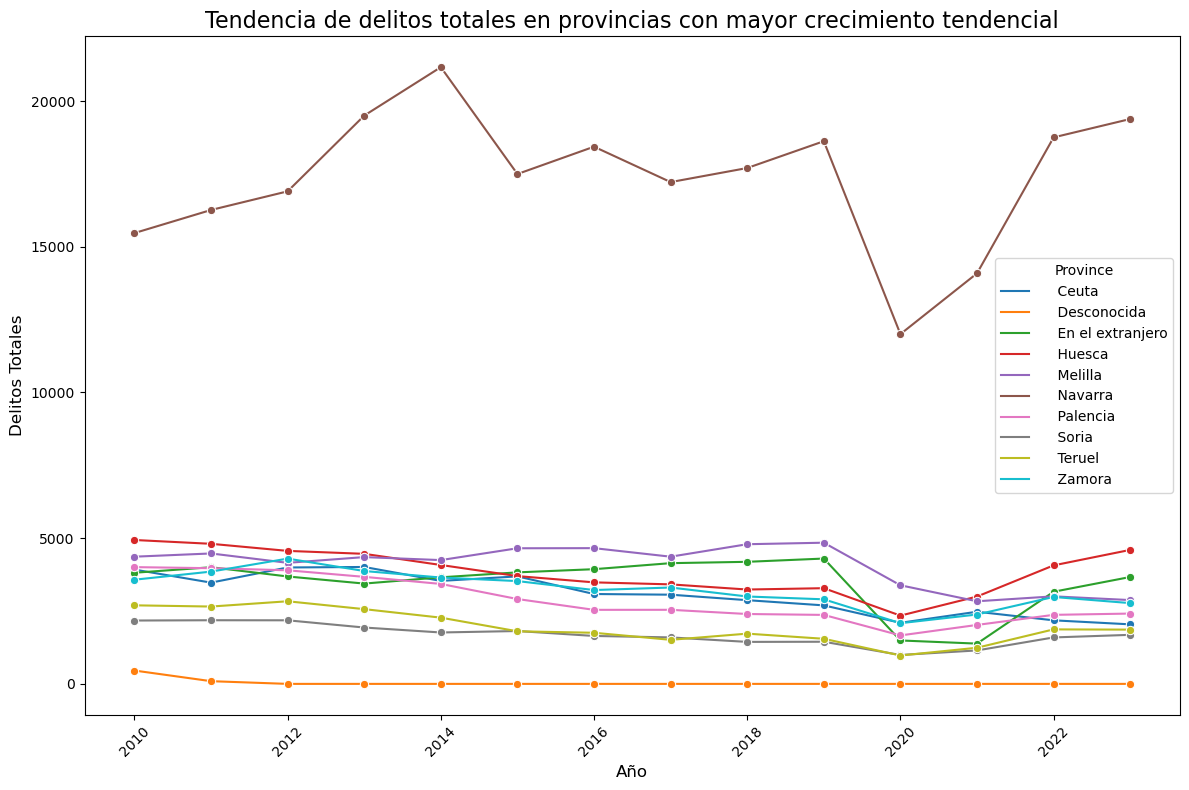

In [30]:
# Configuración del tamaño de la gráfica
plt.figure(figsize=(12, 8))

# Graficar las tendencias de las provincias con mayor crecimiento
sns.lineplot(data=df_filtrado_crecimiento_sorted, x='year', y='total_crimes', hue='Province', marker='o', palette='tab10')

# Ajustar el título y las etiquetas
plt.title('Tendencia de delitos totales en provincias con mayor crecimiento tendencial', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Delitos Totales', fontsize=12)

# Mejorar la visualización de los ticks en el eje X
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
# USELESS TRASH
'''
print(data_clean_years.columns)
data_clean_years.columns = data_clean_years.columns.str.strip()
if 'Assault' not in data_clean_years.columns:
    print("La columna 'Assault' no se encuentra en el DataFrame.")
else:
    print("La columna 'Assault' está presente.")
'''
#data_formated_year = convert_year_into_datetime(data_clean_years)
#df.columns = df.columns.str.lower().str.replace(" ","_").str.replace(".","_").str.replace(":","").str.strip()
#df.rename(columns={"species_" : "species", "unnamed_11" : "death"}, inplace= True)

'''
MAPA COLOREADO POR PROVINCIAS
# Cargar el shapefile de las provincias
gdf_provincias = gpd.read_file('path_to_shapefile.shp')  # Reemplaza con el camino a tu shapefile

# Cargar el DataFrame con los datos de delitos
df_delitos = pd.read_excel('suma_delitos_por_provincia.xlsx')  # Reemplaza con el camino a tu archivo Excel

# Asegúrate de que los nombres de las provincias en ambos DataFrames coincidan
# Puedes necesitar ajustar los nombres o hacer una correspondencia entre ellos

# Unir los datos de delitos con el GeoDataFrame
gdf_provincias = gdf_provincias.merge(df_delitos, left_on='province_column_in_shapefile', right_on='Province')  # Ajusta los nombres de las columnas

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_provincias.plot(column='Assault',  # Reemplaza con la columna que desees visualizar
                    cmap='OrRd',  # Elige un esquema de colores
                    linewidth=0.8,
                    ax=ax,
                    edgecolor='0.8',
                    legend=True)

ax.set_title('Número de Delitos por Provincia en España')
ax.set_axis_off()

plt.show()
'''
